# Import librairies

In [1]:
# Import main librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import librairies to connect to the database
import psycopg2 as ps
import pandas.io.sql as sqlio

# Import librairie to plot and quantify distributions
import seaborn as sns
from collections import Counter
sns.set()

# Import Oversampling librairies
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import KMeansSMOTE

# Import undersampling librairies
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import OneSidedSelection

# Import tools
%run ../Tools.ipynb

# Connect to database

In [2]:
conn = ps.connect(dbname="SLA", user="postgres", password="root", host="localhost", port="5432")

# Get data from database

In [3]:
# Set variables
variables = ['WEIGHT_VAR_M12', 'GROUPEDEB']

# Set sql query
sql = 'SELECT * FROM "PATIENTS"'

# Get data from database
df_patients = sqlio.read_sql_query(sql, conn)[variables].copy()
print("Nombre de patients restant :", df_patients.shape[0])

Nombre de patients restant : 1045


C:\Users\guill\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


# Drop null values

In [4]:
# Drop null values
df_patients = df_patients.dropna().copy()
print("Nombre de patients restant :", df_patients.shape[0])

Nombre de patients restant : 233


# Drop "Respiratoire" Diagnostic

In [5]:
df_patients = df_patients[df_patients.GROUPEDEB != "Respiratoire"]
print("Nombre de patients restant :", df_patients.shape[0])

Nombre de patients restant : 228


# Separate features and target

In [6]:
# Get features
X = df_patients.drop(df_patients.columns.values[-1], axis=1)

# Get target
y = df_patients[df_patients.columns.values[-1]]

# Encode categorical data

In [7]:
X = encodeData(X)

# Target distribution after removed unwanted rows

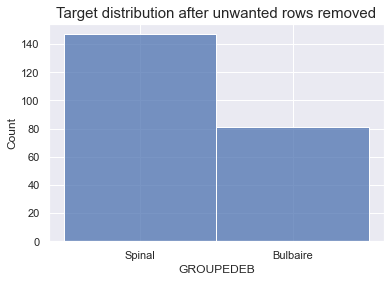

Data : Counter({'Spinal': 147, 'Bulbaire': 81})


In [8]:
# Plot distribution
sns.histplot(data=y)
plt.title("Target distribution after unwanted rows removed", fontsize=15)
plt.show()

# summarize class distribution
counter = Counter(y)
print('Data :', counter)

# Plot data

In [9]:
sns.pairplot(x_vars=[X.columns.values[0]], y_vars=[X.columns.values[1]], data=df_patients, hue="GROUPEDEB", height=5)
plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

# Sampling data

## Set up

In [10]:
# Use of Oversampling
global useSmote, useBorderlineSMOTE, useSVMSMOTE, useKMeansSMOTE
useSmote = False; useBorderlineSMOTE = False; useSVMSMOTE = False; useKMeansSMOTE = False

# Use of Undersampling
global useNearMiss, useCondensedNearestNeighbour, useTomekLinks, useEditedNearestNeighbours, useOneSidedSelection
useNearMiss = False; useCondensedNearestNeighbour = False; useTomekLinks = False; 
useEditedNearestNeighbours = False; useOneSidedSelection = True

# Sampling parameters
global n_neighbors, sampling_strategy, NearMiss_version, n_seeds_S
n_neighbors = 5; sampling_strategy = 1; NearMiss_version = 3; n_seeds_S = 105

## Execute Sampling

In [11]:
X_sampled, y_sampled = oversampling(X, y)
X_sampled, y_sampled = undersampling(X, y)

## Plot sampled data distribution

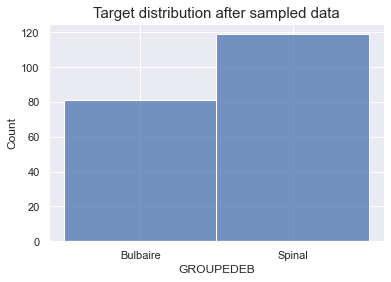

Counter({'Spinal': 119, 'Bulbaire': 81})


In [12]:
# Plot distribution
sns.histplot(data=y_sampled)
plt.title("Target distribution after sampled data", fontsize=15)
plt.show()

# summarize class distribution
counter = Counter(y_sampled)
print(counter)

## Plot scatterplot with sampled data

In [13]:
# dictionary of lists
dict = {X.columns.values[0]: X_sampled[X.columns.values[0]],
        X.columns.values[1]: X_sampled[X.columns.values[1]],
        y.name:y_sampled}

df_patients_sampled = pd.DataFrame(dict)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [14]:
sns.pairplot(x_vars=[X.columns.values[0]], y_vars=[X.columns.values[1]], data=df_patients_sampled, hue="GROUPEDEB", height=5)
plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1